# Week 10 - PCA and Dimension Reduction Homework

Execute the below code and answer the following questions. Do NOT commit the csv file!

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use X_train).
- Remember to scale the data first.
- What number of components would you recommend based on your analysis?
- Explain your results using markdown cells.

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.transform(X_test)

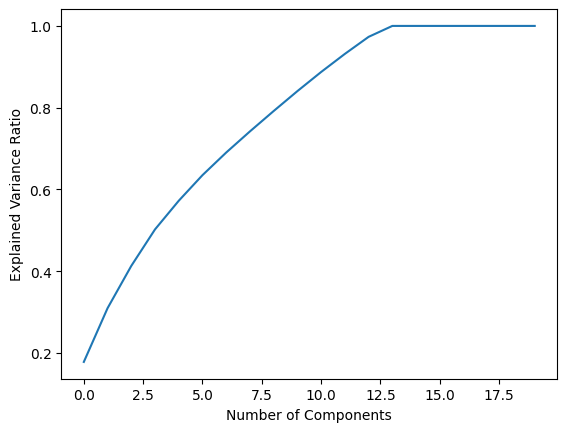

In [7]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_std)

# Plot the explained variance ratio for each principal component
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

#### The plot shows that the first 13 principal components explain most of the variance in the data. Beyond the 13th principal component, the explained variance ratio levels off. Therefore, we can reduce the data to 13 principal components.

# Question 2
- Evaluate the target variable in the df object.
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell.

In [13]:
df['target']

0       0.0
1       2.0
2       0.0
3       1.0
4       0.0
       ... 
1495    0.0
1496    0.0
1497    2.0
1498    0.0
1499    2.0
Name: target, Length: 1500, dtype: float64

In [12]:
df['target'].unique()

array([0., 2., 1.])

#### since the target has 3 Unique classes, this is a classification problem 

#### we can use multiclass classification evaluation metrics such as accuracy, precision, recall, and F1-score in evalutating the predictive model

In [16]:
df['target'].value_counts()

0.0    744
2.0    380
1.0    376
Name: target, dtype: int64

#### It can be seen that data set is imbalanced

#### I will choose F1 Score as my choice to evaluate the models to acccount for imbalance data since we dont if there is any bias in the data in which case we might need to go either with precision or recall 

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.
- Which model would you choose? Explain your results in the markdown cells.
- What is the accuracy, precision, and recall for the test data?

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression(random_state=40)
model.fit(X_train, y_training)

LogisticRegression(random_state=40)

In [ ]:
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print("F1 Score ", f1)

Accuracy: 0.7033
Precision: 0.7040
Recall: 0.7033
F1 Score  0.702671996347409


 #### since model is facing class imbalance difficulties, To enhance the performance , i have employed "class weights" technique which improved precision,recall and F1 score from 67% to 70%

#### Initially I applied grid search to use the best practice discussed in the classs. However i felt that we cannot compare appropriately the difference with and without pca if we use gridsearch as optimal paramters may come differently in both cases. Hence i removed it and used standard logistic in both cases to see how pca addition makes difference

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.
- Which model performs the best on the training data? Explain your results in markdown cells.
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA(n_components = 13)),
              ('model', LogisticRegression(random_state=40))
             ])


In [101]:
p = p.fit(X_train, y_training)
score = p.score(X_test,y_test)
print(score)

0.71


In [102]:
# evaluate the model
Y_pred = p.predict(X_test)
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred,average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print("F1 Score ", f1)

Accuracy: 0.7100
Precision: 0.7091
Recall: 0.7100
F1 Score  0.7086746808341109


#### Logistic regression with  pca(n_components =13) performed slightly better than original logistic regression model with less significant difference in f1 score .However, adding pca for dimensionality reduction could not give more improvement . It could be the reason that pca while reducing dimensions sometimes can also results in loss of information.

#### However by selecting appropriate hyperparameters for the Logistic regression can significantly influence the pipeline model performance.Since we are doing basic logistic model with and without pca comparison, I removed grid search since it is difficult to compare two models with different parameters

# Question 5
- Without using PCA, create a decision tree model using best practices discussed in class.
- Which model performs the best on the training data? Explain your results in the markdown cells.
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than either of the logistic regression models?

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 40)
dt.fit(X_train, y_training)
y_pred = dt.predict(X_test)
    
# Compute evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
print("Accuracy", acc)
print("Precision", precision)
print(f'Recall: {recall:.4f}')
print("F1 Score ", f1)

#criterion='entropy', random_state=123, max_depth=3

Accuracy 0.6666666666666666
Precision 0.6847588257153473
Recall: 0.6667
F1 Score  0.6713101553242196


#### Accuracy went down compared to either of the logistic regresssion model and performed less accurately.

#### it is crucial to understand that decision trees may suffer from overfitting if the tree is deep or there are number of irrelevant features in data. 

# Question 6
- Repeat Question 5 but use PCA.
- Does this perform better than the original Decision Tree or the logistic regression models?

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA(n_components = 14)),
              ('model', DecisionTreeClassifier(random_state=40))
             ])

p = p.fit(X_train, y_training)

Y_pred = p.predict(X_test)
score = p.score(X_test,y_test)
print(score)
# evaluate the model
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred,average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print("F1 Score ", f1)

0.74
Accuracy: 0.7400
Precision: 0.7444
Recall: 0.7400
F1 Score  0.7407301914827013


#### The optimal parameter chosen for 'pca__n_components': 14. Using this parameter, the decision tree with PCA achieves an f1 score of 0.74 on the test data. Overall, the decision tree with PCA outperformed better than the original decision tree and original logistic regression models.